In [1]:
import sys, os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from RFSoC_Daq import RFSoC_Daq
from Biquad import Biquad
from SimBiquad import SimBiquad
from Biquad_Daq import Biquad_Daq
from Waveforms.Waveform import Waveform

In [2]:
daq = Biquad_Daq()
sim = SimBiquad()

DEBUG:RFSoC_Daq:Asked to load overlay at /home/xilinx/python/zcumts.py
DEBUG:RFSoC_Daq:Adding directory /home/xilinx/python to module search path
DEBUG:RFSoC_Daq:Changing directory to /home/xilinx/python
DEBUG:RFSoC_Daq:Going to try to import zcumts
DEBUG:RFSoC_Daq:Found Overlay class Overlay from module pynq.overlay
DEBUG:RFSoC_Daq:Found RFSoC overlay zcuMTS


Turning on SYNC
Turning off SYNC


DEBUG:RFSoC_Daq:Created RFSoC device
DEBUG:RFSoC_Daq:Restoring original module search path
DEBUG:RFSoC_Daq:Going back to original directory /home/xilinx/rfsoc-pydaq/Biquad/Notebooks


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [4]:
A = 0.8028107634961998
B = -0.9163499900207577
P = 0.7782168894289043
theta = 0.2996203532999784 * np.pi

daq.update_params(A, B, P, theta)
daq.quantise_coeffs()
daq.run_Biquad()
sim.update_params(A, B, P, theta)
sim.quantise_coeffs()

sim.data = daq.adcBuffer[0] >> 4

In [5]:
# fig, axS21 = plt.subplots(1, 1, figsize=(25, 15))

# import time
# start_time = time.time()

# xf, S21_log_mag, S21_log_mag_sim = daq.S21_loop_sim(sim, 10, 17)

# end_time = time.time()
# print(f"Time taken: {end_time - start_time} seconds")

# x_min = 200*10**6
# x_max = 1200*10**6
# indices = (xf >= x_min) & (xf <= x_max)

# axS21.plot(xf[indices]/10**6, S21_log_mag[indices], label='Decimated Daq', color='orange', alpha=0.7, linewidth=0.7)
# axS21.plot(xf[indices]/10**6, S21_log_mag_sim[indices], label='Undecimated Sim', color='blue', linewidth=0.7)
# axS21.set_xlabel("Frequency (MHz)")
# axS21.set_ylabel("S21 Log Mag (dB)")
# axS21.set_title("Decimated Daq and Full Simulation")

# plt.legend()
# plt.show()

Time taken: 2.4051051139831543 seconds
-12.958175518738486
-4.181505093217167
Filter Frequency : 243.047575MHz | Magnitude -21.82344649727927


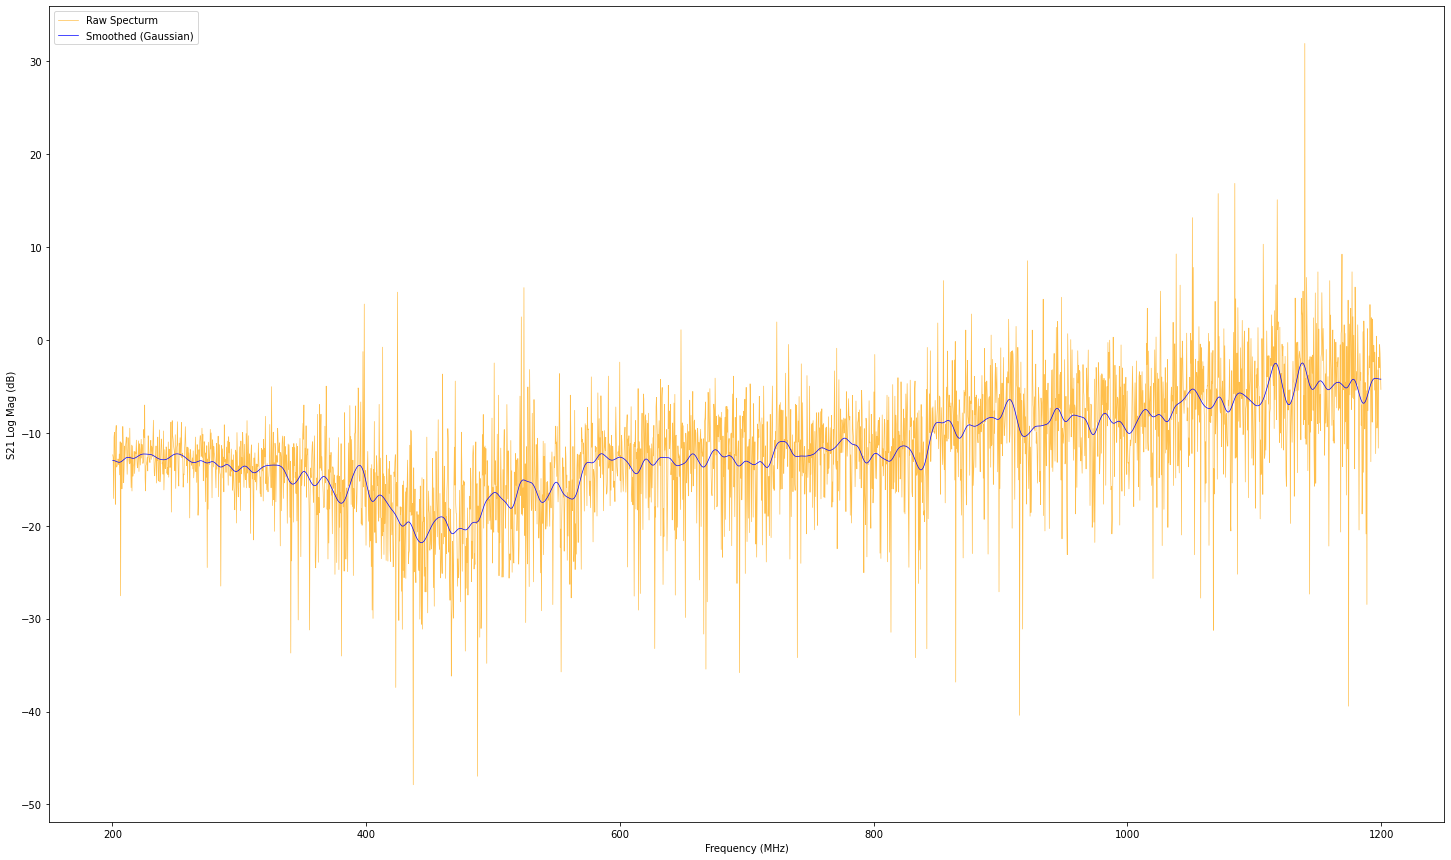

In [8]:
fig, axS21 = plt.subplots(1, 1, figsize=(25, 15))

import time
start_time = time.time()

xf, S21_log_mag = daq.S21_loop(100,17)

end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

x_min = 200*10**6
x_max = 1200*10**6
indices = (xf >= x_min) & (xf <= x_max)

axS21.plot(xf[indices]/10**6, S21_log_mag[indices], label='Raw Specturm', color='orange', alpha=0.7, linewidth=0.7)
axS21.set_xlabel("Frequency (MHz)")
axS21.set_ylabel("S21 Log Mag (dB)")

sigma = 10
y_smoothed_gauss = gaussian_filter1d(S21_log_mag[indices], sigma=sigma)

axS21.plot(xf[indices]/10**6, y_smoothed_gauss, label='Smoothed (Gaussian)', color='blue', linewidth=0.7)

print(y_smoothed_gauss[0])
print(np.mean(y_smoothed_gauss[-20:]))
print(f'Filter Frequency : {xf[np.argmin(y_smoothed_gauss)]/10**6:3f}MHz | Magnitude {min(y_smoothed_gauss)}')


plt.legend()
plt.show()